In [2]:
import pandas as pd
import os

file_path = os.path.join( "..", "Daten",  "Merged_BSR_24Uhr.csv")

df = pd.read_csv(file_path)  
df.tail()

,Schicht,Tour,Tonnage,Temperature_Max (°C),Rain_Sum (mm),Snowfall_Sum (cm),Wind_Speed_Max (km/h),Daylight_Duration (s),Temperature_Max (°C) 3-Day Avg,Rain_Sum (mm) 3-Day Avg,...,Feiertag_Pfingstmontag_shift_1,Feiertag_Pfingstmontag_shift_2,Feiertag_Tag der Arbeit_shift_1,Feiertag_Tag der Arbeit_shift_2,Feiertag_Tag der Befreiung_shift_1,Feiertag_Tag der Befreiung_shift_2,Feiertag_Tag der Deutschen Einheit_shift_1,Feiertag_Tag der Deutschen Einheit_shift_2,Feiertag_Zweiter Weihnachtstag_shift_1,Feiertag_Zweiter Weihnachtstag_shift_2
381656,1,5508,2.90,8.5,2.6,0.0,29.8,27757.76,9.8,3.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
381657,1,2101,7.86,8.5,2.6,0.0,29.8,27757.76,9.8,3.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
381658,1,2102,1.81,8.5,2.6,0.0,29.8,27757.76,9.8,3.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
381659,1,3301,0.35,8.5,2.6,0.0,29.8,27757.76,9.8,3.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
381660,1,3302,4.13,8.5,2.6,0.0,29.8,27757.76,9.8,3.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#inflation droppen
df.drop(['   Brot', 'Fleisch', '    Fisch', '    Molkerei-Eier', '    Speisefette-öle', '    Obst', '    Gemüse',
         '    Zucker, Marmelade, Honig', '    Fertigerichte', '  Kaffee-Tee', '    Wasser-Saft'], axis=1, inplace=True)

In [4]:
X = df.drop(columns=['Tonnage'])  # Features (alle Spalten außer Ziel)
y = df['Tonnage']  # Zielvariable




In [5]:
# Trainingsdaten: 2019, 2020, 2021
X_train = X[X["year"].isin([2019, 2020, 2021])]
y_train = y[X["year"].isin([2019, 2020, 2021])]

# Testdaten: 2022
X_test = X[X["year"] == 2022]
y_test = y[X["year"] == 2022]

# Validierungsdaten: 2023
X_val = X[X["year"] == 2023]
y_val = y[X["year"] == 2023]


print(f"Train: {X_train.shape}, Test: {X_test.shape}, Validation: {X_val.shape}")



Train: (223715, 79), Test: (79232, 79), Validation: (78714, 79)


In [6]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# XGBoost Modell initialisieren
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100)

# Modell mit Trainingsdaten trainieren
model.fit(X_train.drop(columns=['year']), y_train)  # 'year' als Feature entfernen

# Vorhersagen für das Testjahr 2022
y_pred_test = model.predict(X_test.drop(columns=['year']))
test_error = mean_absolute_error(y_test, y_pred_test)
print(f"MAE für Testjahr 2022: {test_error}")

# Vorhersagen für das Validierungsjahr 2023
y_pred_val = model.predict(X_val.drop(columns=['year']))
val_error = mean_absolute_error(y_val, y_pred_val)
print(f"MAE für Validierungsjahr 2023: {val_error}")


MAE für Testjahr 2022: 2.4408846228010623
MAE für Validierungsjahr 2023: 2.757641239154833


In [7]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_val = mean_squared_error(y_val, y_pred_val)
print(f"MSE für Testjahr 2022: {mse_test}")
print(f"MSE für Validierungsjahr 2023: {mse_val}")

MSE für Testjahr 2022: 10.330207193674157
MSE für Validierungsjahr 2023: 13.969527609591209


In [8]:
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)
print(f"RMSE für Testjahr 2022: {rmse_test}")
print(f"RMSE für Validierungsjahr 2023: {rmse_val}")


RMSE für Testjahr 2022: 3.2140639685099854
RMSE für Validierungsjahr 2023: 3.7375831241045607


/Users/blongsch/ikt/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/blongsch/ikt/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


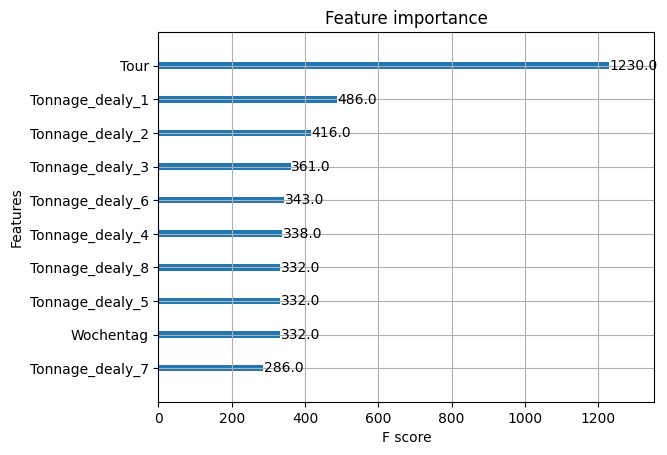

In [9]:
import matplotlib.pyplot as plt

# Feature Importance plotten
xgb.plot_importance(model, importance_type="weight", max_num_features=10)
plt.show()


**HyperparameterTuning**

1. n_estimators (Anzahl der Bäume)

    Werte: [100, 200, 300]
    Gibt an, wie viele Entscheidungsbäume das Modell verwendet.
    Höhere Werte können die Modellleistung verbessern, erhöhen aber auch die Trainingszeit.

2. learning_rate (Lernrate)

    Werte: [0.01, 0.05, 0.1]
    Kontrolliert, wie stark das Modell bei jedem Schritt die Fehler reduziert.
    Niedrige Werte (z. B. 0.01) führen zu einem langsameren, aber oft besseren Training.
    Höhere Werte (z. B. 0.1) führen zu schnellerem Lernen, bergen aber die Gefahr des Overfittings.

3. max_depth (Maximale Tiefe der Bäume)

    Werte: [3, 5, 7]
    Bestimmt, wie tief einzelne Entscheidungsbäume wachsen dürfen.
    Tiefere Bäume können komplexere Muster lernen, aber auch zu Overfitting führen.

4. subsample (Stichprobenrate für jede Iteration)

    Werte: [0.8, 0.9, 1.0]
    Gibt an, welcher Prozentsatz der Daten für jeden Baum verwendet wird.
    1.0 bedeutet, dass alle Daten verwendet werden (kein Bagging).
    Kleinere Werte (z. B. 0.8) helfen, Overfitting zu reduzieren.

5. colsample_bytree (Feature-Sampling)

    Werte: [0.8, 0.9, 1.0]
    Bestimmt, wie viele Features zufällig für den Aufbau jedes Baums ausgewählt werden.
    1.0 bedeutet, dass alle Features verwendet werden.
    Kleinere Werte (z. B. 0.8) können helfen, Overfitting zu reduzieren.

In [10]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Beispielmodell
model = xgb.XGBRegressor()

# Definiere den Parameterraum
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Grid Search durchführen
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Beste Parameter und Modell
print("Beste Parameter: ", grid_search.best_params_)
print("Beste Genauigkeit: ", grid_search.best_score_)

Beste Parameter:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Beste Genauigkeit:  -9.41852686968144


In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Vorhersagen mit dem besten Modell
y_pred = grid_search.best_estimator_.predict(X_test)  # X_test sind deine Testdaten

# Berechnung des MSE
mse = mean_squared_error(y_test, y_pred)  # y_test sind die tatsächlichen Zielwerte
print("MSE nach dem Tuning:", mse)

# Berechnung des RMSE
rmse = np.sqrt(mse)
print("RMSE nach dem Tuning:", rmse)


MSE nach dem Tuning: 9.567251567169201
RMSE nach dem Tuning: 3.0930974066733175
